In [1]:
from barennet import SimilarityModel
import tensorflow as tf
import numpy as np

# Uncomment the line below if if you have tensorflow issues regarding your GPU:

tf.config.set_visible_devices([], 'GPU')

2024-05-20 13:26:46.608751: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-20 13:26:46.632577: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-20 13:26:46.632606: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-20 13:26:46.633232: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-20 13:26:46.637064: I tensorflow/core/platform/cpu_feature_guar

We will find the incomplete similarity exponents for the friction roughness data
by Nikuradse (1933). We know that the dimensionless quantities involved are 
$(f, Re, r/D)$ and, although we don't know the relation between them, we seek:

$$ f = Re^{\alpha} \Phi^{(1)} \left( Re^{\beta} \left( r/D \right) \right)$$

We provide a data file by Nikuradse. As the MDDP construction is not really 
important in our case, we will work directly with the dimensionless quantities.

In [2]:
data_path = "../Data/nikuradse_friction_roughness_data.xlsx"
dimensionally_independent_parameters = ["mu", "rho", "D"]
dimensionally_dependent_parameters = ["r", "U_bar"]
dimensional_qoi = "f_d"
non_dimensional_parameters = ["r/D", "Re"]
non_dimensional_qoi = "f"
non_dimensional_params_construction = { 
    "r/D": {"r": 1.0, "U_bar": 0.0, "mu": 0.0, "rho": 0.0, "D": -1.0},
    "Re": {"r": 0.0, "U_bar": 1.0, "mu": -1.0, "rho": 1.0, "D": 1.0}, 
}
non_dimensional_qoi_construction = {
    "f": {"f_d": 1.0, "r": 0.0, "U_bar": 0.0, "mu": 0.0, "rho": 0.0, "D": 0.0}
}
non_similar_params = ["r/D"]
similar_params = ["Re"]

In [3]:
similarity_model = SimilarityModel(
    data_path=data_path,
    dimensionally_independent_params=dimensionally_independent_parameters,
    dimensionally_dependent_params=dimensionally_dependent_parameters,
    dimensional_qoi=dimensional_qoi,
    non_dimensional_params=non_dimensional_parameters,
    non_dimensional_qoi=non_dimensional_qoi,
    non_dimensional_params_construction=non_dimensional_params_construction,
    non_dimesional_qoi_construction=non_dimensional_qoi_construction,
    non_similar_params=non_similar_params,
    similar_params=similar_params)

### Buckingham's Similarity Group

We can print Buckingham's Similarity Group, but as we don't care about the 
dimensionless construction in this setting, it will be meaningless.

In [4]:
similarity_model.print_buckingham_similarity_group()

mu* = A_1^1.0 A_2^0.0 A_3^0.0 mu
rho* = A_1^0.0 A_2^1.0 A_3^0.0 rho
D* = A_1^0.0 A_2^0.0 A_3^1.0 D
r* = A_1^-0.0 A_2^0.0 A_3^1.0 r
U_bar* = A_1^1.0 A_2^-1.0 A_3^-1.0 U_bar
f_d* = A_1^-0.0 A_2^-0.0 A_3^-0.0 f_d


We can now use the find_incomplete_similarity method in order to use the BarenNet to find proper incomplete similarity exponents, as well as estimating the function $\Phi^{(1)}$ with a Deep Neural Network.

In [9]:
similarity_model.find_incomplete_similarity(n_tries=5, n_epochs=10000, tol=1e-2)

Epoch 1/10000
12/12 - 0s - loss: 39958970368.0000 - 493ms/epoch - 41ms/step
Epoch 2/10000
12/12 - 0s - loss: 7544839680.0000 - 12ms/epoch - 990us/step
Epoch 3/10000
12/12 - 0s - loss: 1033246848.0000 - 14ms/epoch - 1ms/step
Epoch 4/10000
12/12 - 0s - loss: 260043616.0000 - 14ms/epoch - 1ms/step
Epoch 5/10000
12/12 - 0s - loss: 144850752.0000 - 12ms/epoch - 993us/step
Epoch 6/10000
12/12 - 0s - loss: 168518064.0000 - 13ms/epoch - 1ms/step
Epoch 7/10000
12/12 - 0s - loss: 244055632.0000 - 18ms/epoch - 2ms/step
Epoch 8/10000
12/12 - 0s - loss: 213456560.0000 - 33ms/epoch - 3ms/step
Epoch 9/10000
12/12 - 0s - loss: 181041440.0000 - 21ms/epoch - 2ms/step
Epoch 10/10000
12/12 - 0s - loss: 93156872.0000 - 12ms/epoch - 1ms/step
Epoch 11/10000
12/12 - 0s - loss: 50552160.0000 - 12ms/epoch - 1ms/step
Epoch 12/10000
12/12 - 0s - loss: 31701274.0000 - 10ms/epoch - 800us/step
Epoch 13/10000
12/12 - 0s - loss: 14682881.0000 - 12ms/epoch - 975us/step
Epoch 14/10000
12/12 - 0s - loss: 18148428.0000 - 

2024-05-20 13:38:07.043013: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.


Epoch 9810/10000
12/12 - 0s - loss: 0.1252 - 13ms/epoch - 1ms/step
Epoch 9811/10000
12/12 - 0s - loss: 0.1252 - 41ms/epoch - 3ms/step
Epoch 9812/10000
12/12 - 0s - loss: 0.1253 - 16ms/epoch - 1ms/step
Epoch 9813/10000
12/12 - 0s - loss: 0.1259 - 10ms/epoch - 859us/step
Epoch 9814/10000
12/12 - 0s - loss: 0.1260 - 11ms/epoch - 945us/step
Epoch 9815/10000
12/12 - 0s - loss: 0.1271 - 11ms/epoch - 911us/step
Epoch 9816/10000
12/12 - 0s - loss: 0.1249 - 10ms/epoch - 833us/step
Epoch 9817/10000
12/12 - 0s - loss: 0.1255 - 12ms/epoch - 1ms/step
Epoch 9818/10000
12/12 - 0s - loss: 0.1253 - 12ms/epoch - 970us/step
Epoch 9819/10000
12/12 - 0s - loss: 0.1255 - 11ms/epoch - 908us/step
Epoch 9820/10000
12/12 - 0s - loss: 0.1255 - 10ms/epoch - 847us/step
Epoch 9821/10000
12/12 - 0s - loss: 0.1251 - 12ms/epoch - 1ms/step
Epoch 9822/10000
12/12 - 0s - loss: 0.1253 - 16ms/epoch - 1ms/step
Epoch 9823/10000
12/12 - 0s - loss: 0.1252 - 14ms/epoch - 1ms/step
Epoch 9824/10000
12/12 - 0s - loss: 0.1254 - 13m

Hello

In [10]:
print(similarity_model.incomplete_similarity_exponents_dict)

{'r/D': {'Re': 0.7815293}, 'f': {'Re': 0.22047572}}


Now that incomplete similarity has been found, our package has already automatically calculated the renormalization group from the exponents found. Much like Buckingham's similarity group, we can print it with the following method:

In [11]:
similarity_model.print_renormalization_group()

mu* = mu
rho* = rho
D* = D
U_bar* = B_2^1.0 U_bar
r* = B_2^-0.7815293073654175 r
f_d* = B_2^-0.2204757183790207 f_d


In [4]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
plt.rc('mathtext', fontset="cm")
import matplotlib.ticker as mtick
from matplotlib import cm # Colormaps
import matplotlib.gridspec as gridspec
import seaborn as sns

from tutorial_utils.plotting_methods import (plot_nikuradse_data,
                                             plot_nikuradse_data_renormalized,
                                             plot_nikuradse_data_goldenfeld_exponents)

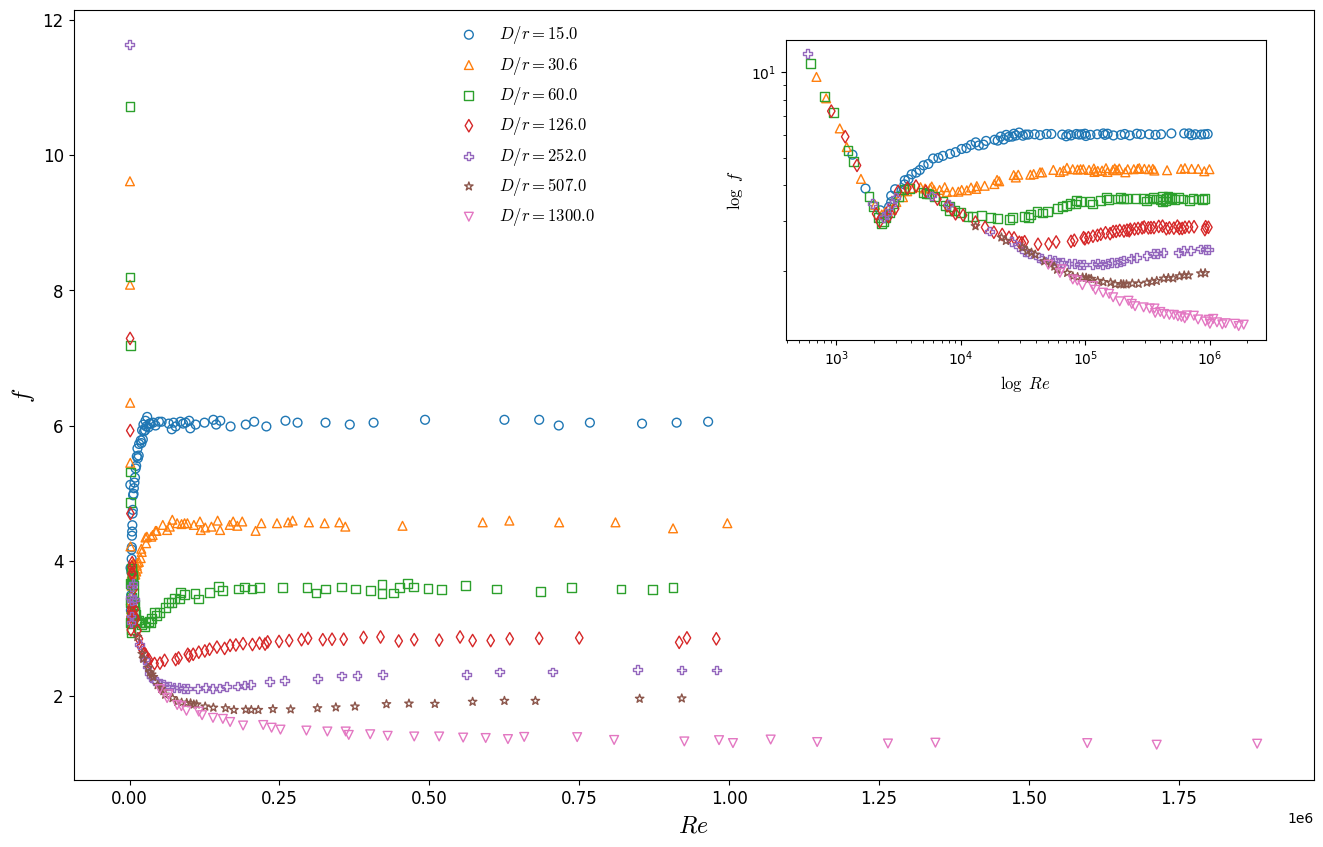

In [5]:
plot_nikuradse_data()

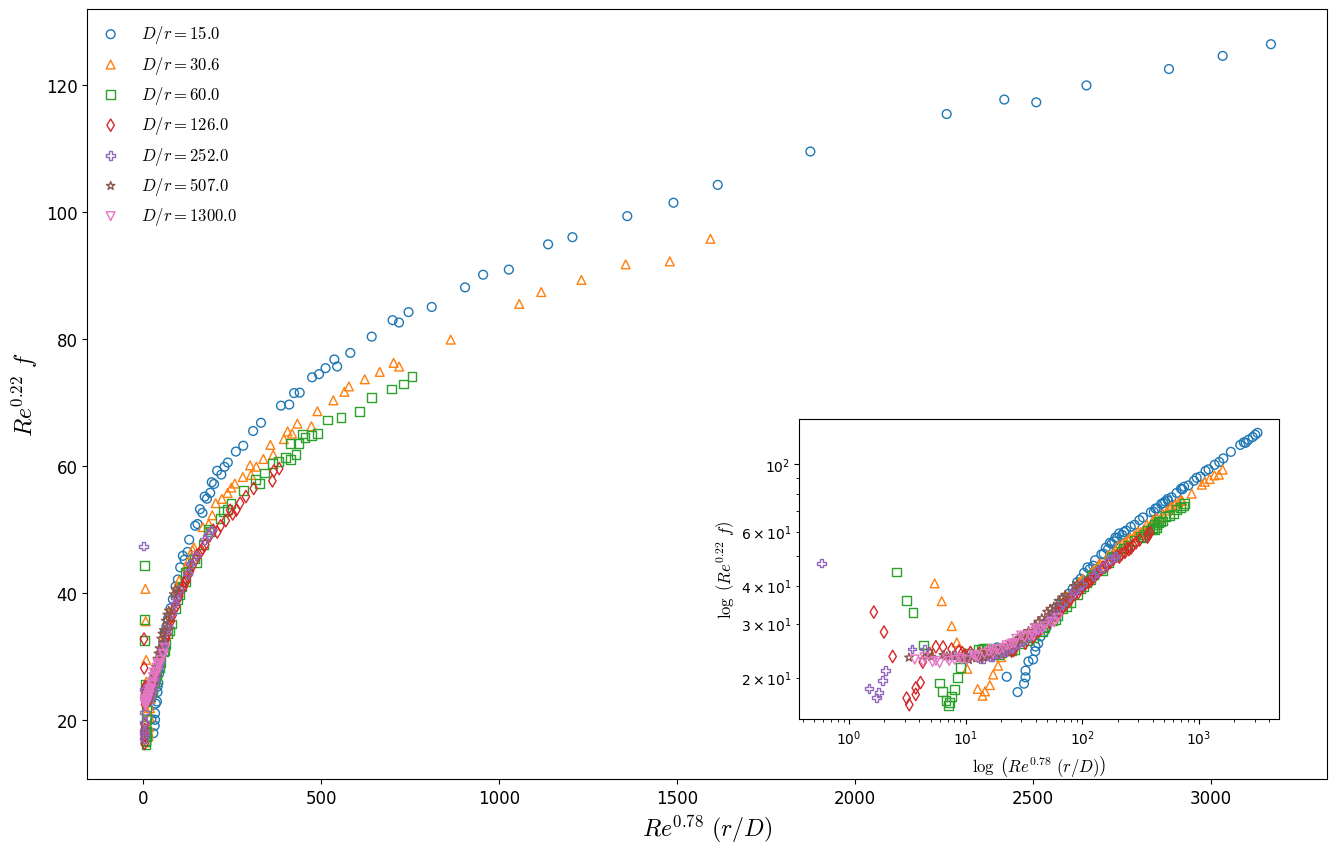

In [6]:
plot_nikuradse_data_renormalized()

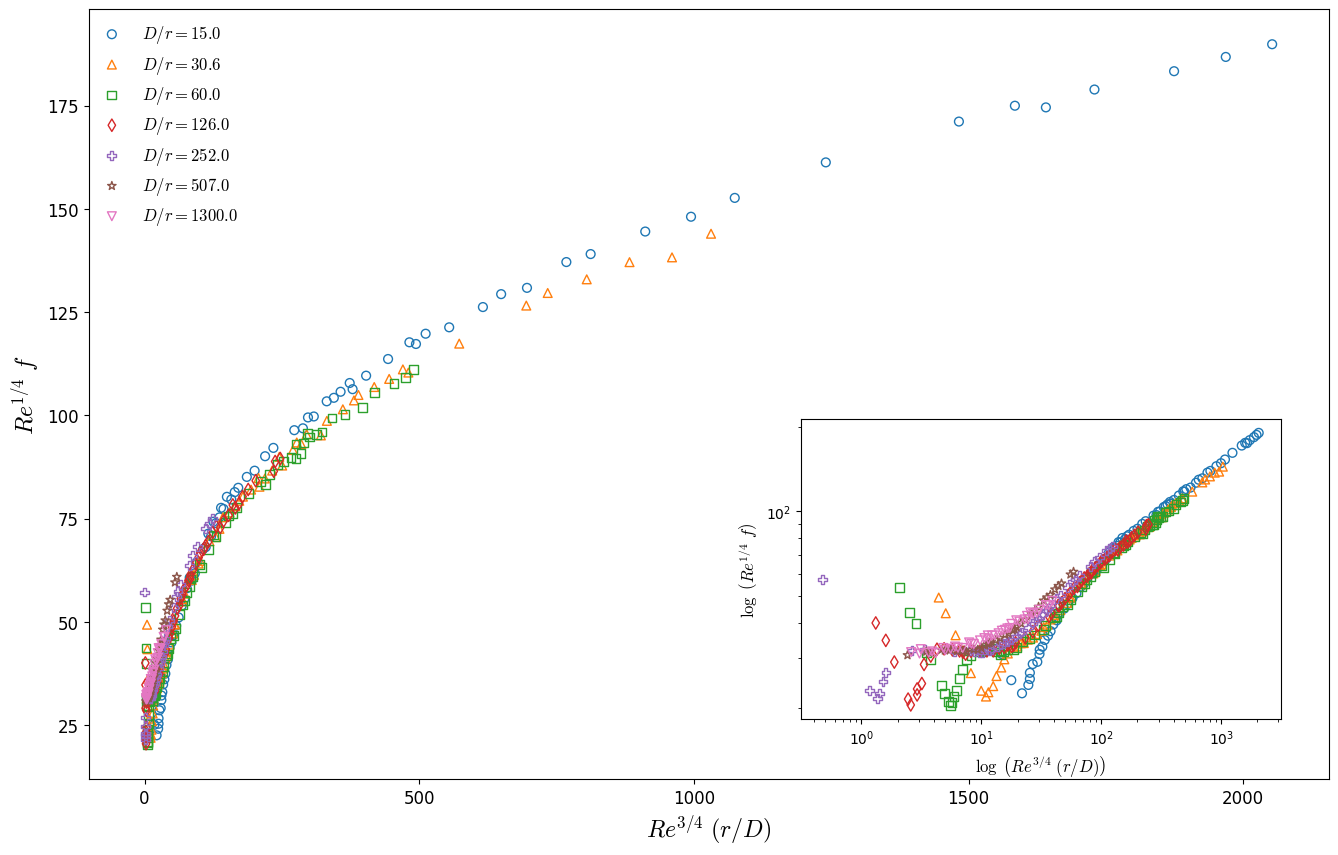

In [7]:
plot_nikuradse_data_goldenfeld_exponents()